# **Crimes in US Communities - Analytics Project**

In [1]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Meine Dateien/crimedata.csv'

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(file_path)
df.head()

,communityName,state,countyCode,communityCode,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39.0,5320.0,11980,3.10,1.37,91.78,6.50,1.88,...,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,Marpletownship,PA,45.0,47616.0,23123,2.82,0.80,95.57,3.44,0.85,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,Tigardcity,OR,NaN,NaN,29344,2.43,0.74,94.33,3.43,2.35,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51
3,Gloversvillecity,NY,35.0,29443.0,16656,2.40,1.70,97.35,0.50,0.70,...,225.0,1301.78,716.0,4142.56,47.0,271.93,NaN,NaN,306.64,NaN
4,Bemidjicity,MN,7.0,5068.0,11245,2.76,0.53,89.16,1.17,0.52,...,91.0,728.93,1060.0,8490.87,91.0,728.93,5.0,40.05,NaN,9988.79


In [4]:
import pandas as pd
df = pd.read_csv(file_path)

# Select the most relevant features
df = df[[
    'communityName',
    'population',
    'medIncome',
    'PctPopUnderPov',
    'PctUnemployed',
    'PctBSorMore',
    'PctFam2Par',
    'medFamInc',
    'ViolentCrimesPerPop',
    'murdPerPop',
    'PctHousOwnOcc',
    'PctPopUnderPov'
]]

# Rename the columns for better readability
df.columns = [
    'Community Name',
    'Population',
    'Median Household Income',
    '% Poverty Rate',
    '% Unemployment Rate',
    '% Education (Bachelor+)',
    '% Two-Parent Families',
    'Median Family Income',
    'Violent Crime',
    'Murder Rate per Population',
    '% Home Ownership Rate',
    '% People under Poverty Line'
]

# Bring in in a new order
df = df[[
    'Community Name',
    'Population',
    'Median Household Income',
    '% Poverty Rate',
    '% Unemployment Rate',
    '% Education (Bachelor+)',
    '% Two-Parent Families',
    'Median Family Income',
    '% Home Ownership Rate',
    '% People under Poverty Line',
    'Murder Rate per Population',
    'Violent Crime'
]]

df.head()


,Community Name,Population,Median Household Income,% Poverty Rate,% Unemployment Rate,% Education (Bachelor+),% Two-Parent Families,Median Family Income,% Home Ownership Rate,% People under Poverty Line,Murder Rate per Population,Violent Crime
0,BerkeleyHeightstownship,11980,75122,1.96,2.70,48.18,91.43,79584,91.01,1.96,0.0,41.02
1,Marpletownship,23123,47917,3.98,2.43,29.89,86.91,55323,84.88,3.98,0.0,127.56
2,Tigardcity,29344,35669,4.75,4.01,30.13,78.54,42112,57.79,4.75,8.3,218.59
3,Gloversvillecity,16656,20580,17.23,9.86,10.81,64.02,26501,54.89,17.23,0.0,306.64
4,Bemidjicity,11245,17390,29.99,9.08,25.28,58.59,24018,53.57,29.99,0.0,NaN


## **Feature Explanation**
* Community Name: This is essential for identifying the community being analyzed.
* Population: Understanding the size of the population is fundamental to normalizing data and making comparisons across communities.
* Median Household Income: This gives insight into the economic health of the community by showing the average income level of households.
* Poverty Rate: The percentage of people living under the poverty line is a critical indicator of economic hardship within the community.
* Unemployment Rate: This is an important economic indicator, showing the percentage of people unable to find work, which often correlates with other social issues.
* Education (Bachelor+): The percentage of the population with at least a Bachelor’s degree gives insight into the educational attainment of the community, which is often linked to economic opportunities and quality of life.
* Two-Parent Families: This feature highlights family structure, which can affect the social stability of the community. Higher percentages of two-parent families often correlate with better social outcomes for children.
* Median Family Income: Median family income complements household income by focusing on the financial well-being of families, providing additional context to the economic health of the community.
* People under Poverty Line: This feature indicates the percentage of individuals living below the poverty threshold in the community
* Home Ownership Rate: Homeownership is often a sign of economic stability and long-term investment in the community, making it a useful metric for analyzing wealth and security.
* Murder Rate per Pop: This feature represents the murder rate per capita, providing a critical indicator of violent crime and overall safety in the community
* Violent Crime: Crime rates, particularly violent crime, are key measures of the safety and security of a community.

## **Explorative Data Analysis**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Community Name               2215 non-null   object 
 1   Population                   2215 non-null   int64  
 2   Median Household Income      2215 non-null   int64  
 3   % Poverty Rate               2215 non-null   float64
 4   % Unemployment Rate          2215 non-null   float64
 5   % Education (Bachelor+)      2215 non-null   float64
 6   % Two-Parent Families        2215 non-null   float64
 7   Median Family Income         2215 non-null   int64  
 8   % Home Ownership Rate        2215 non-null   float64
 9   % People under Poverty Line  2215 non-null   float64
 10  Murder Rate per Population   2215 non-null   float64
 11  Violent Crime                1994 non-null   float64
dtypes: float64(8), int64(3), object(1)
memory usage: 207.8+ KB


In [6]:
df.isnull().sum()

,0
Community Name,0
Population,0
Median Household Income,0
% Poverty Rate,0
% Unemployment Rate,0
% Education (Bachelor+),0
% Two-Parent Families,0
Median Family Income,0
% Home Ownership Rate,0
% People under Poverty Line,0


In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

,0
Community Name,0
Population,0
Median Household Income,0
% Poverty Rate,0
% Unemployment Rate,0
% Education (Bachelor+),0
% Two-Parent Families,0
Median Family Income,0
% Home Ownership Rate,0
% People under Poverty Line,0


In [9]:
df.duplicated().sum()

0

In [10]:
df.describe(include=['number']).T

,count,mean,std,min,25%,50%,75%,max
Population,1994.0,52251.433300,202147.523179,10005.00,14359.2500,22681.000,43153.7500,7322564.00
Median Household Income,1994.0,33699.327482,13391.741380,11576.00,23597.0000,30896.000,41214.7500,123625.00
% Poverty Rate,1994.0,11.795933,8.509501,0.64,4.6925,9.650,17.0775,48.82
% Unemployment Rate,1994.0,6.023862,2.725405,1.32,4.0900,5.485,7.4300,23.83
% Education (Bachelor+),1994.0,22.991550,12.514273,1.63,14.0900,19.625,28.9350,73.63
% Two-Parent Families,1994.0,73.900848,10.301559,32.24,67.6725,74.770,81.6450,93.60
Median Family Income,1994.0,39552.840020,14202.644655,13785.00,29307.2500,36009.500,46682.7500,131315.00
% Home Ownership Rate,1994.0,62.631605,13.846416,16.86,54.0900,62.080,71.5950,96.36
% People under Poverty Line,1994.0,11.795933,8.509501,0.64,4.6925,9.650,17.0775,48.82
Murder Rate per Population,1994.0,5.981364,9.131550,0.00,0.0000,2.500,8.6325,91.09


In [11]:
df.describe(include=['object']).T

,count,unique,top,freq
Community Name,1994,1828,Greenvillecity,5


### **Univariate Analysis**

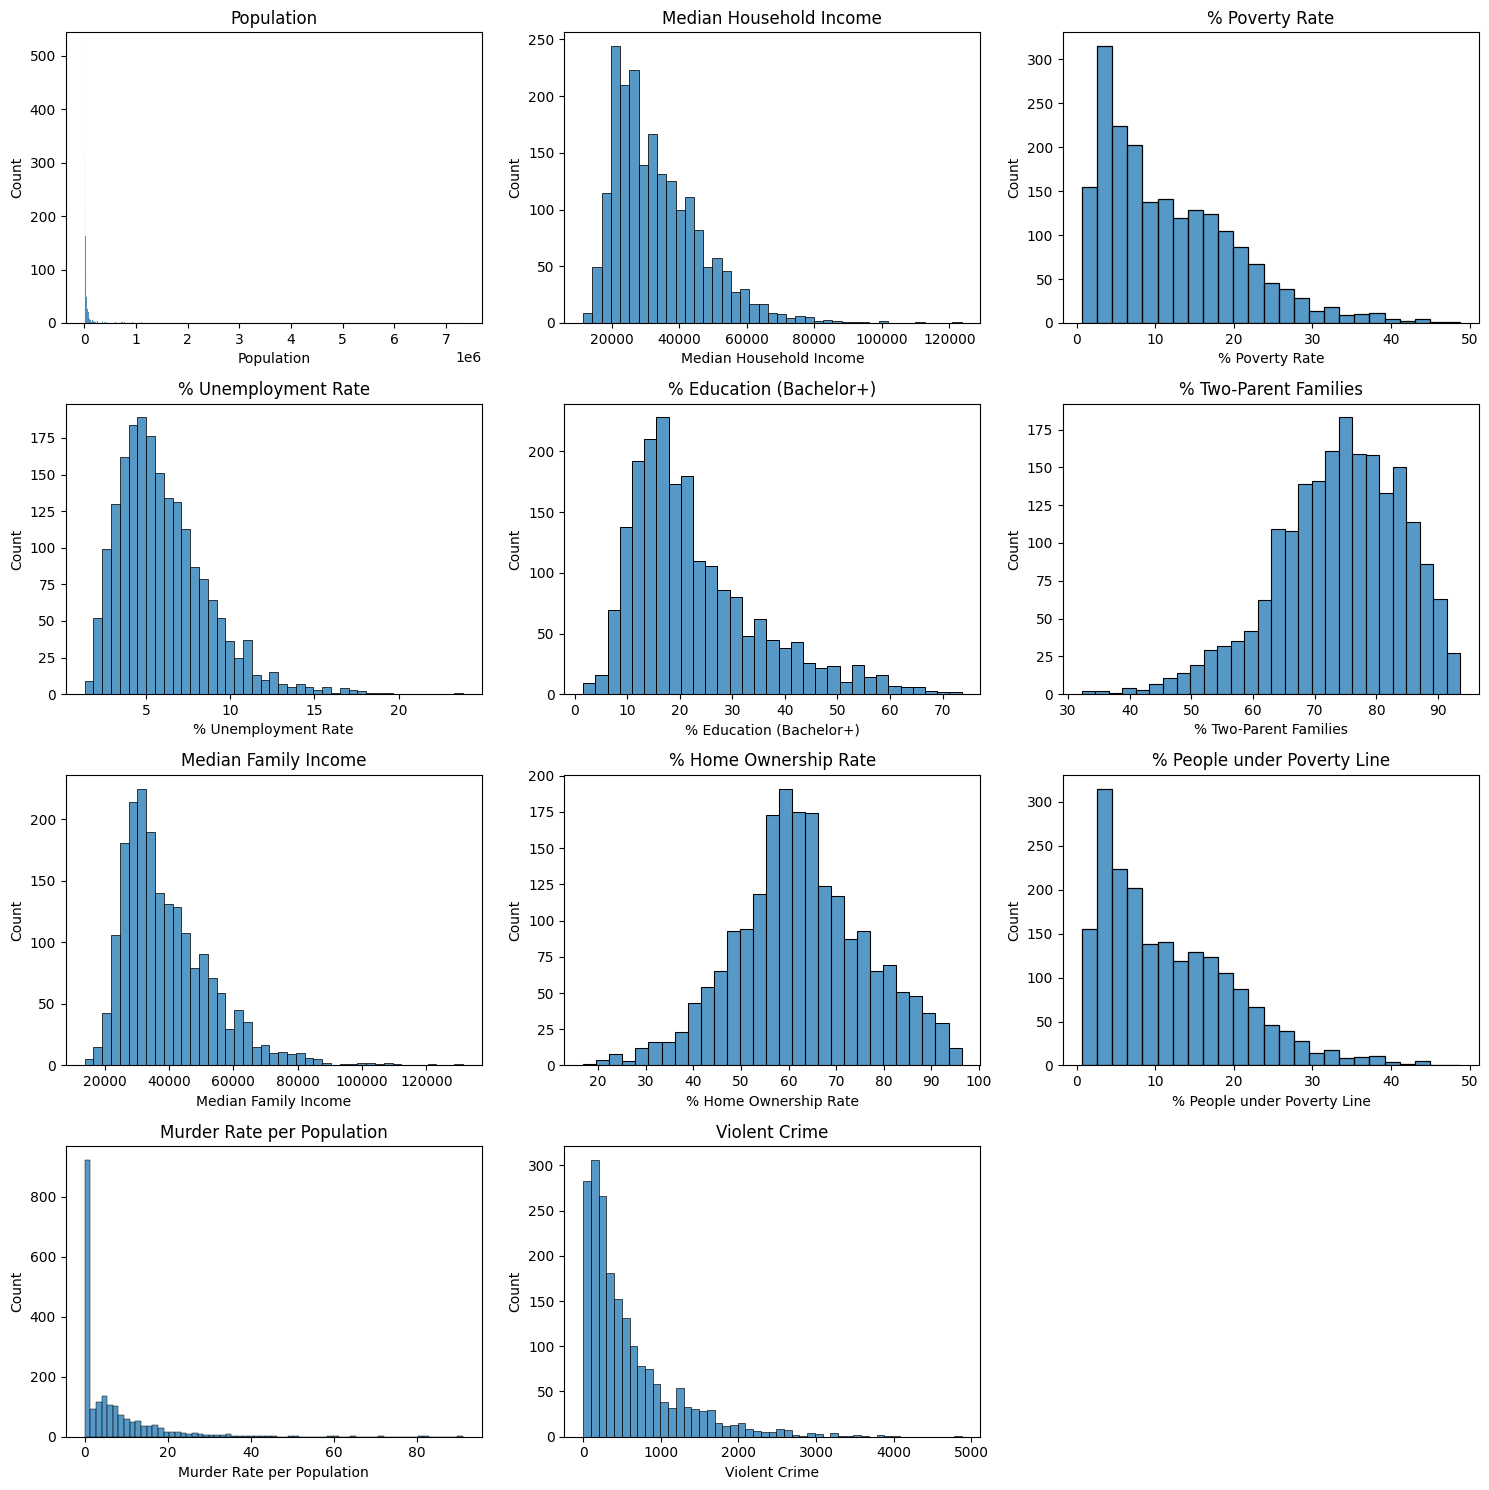

In [12]:
# For numerical Features

import matplotlib.pyplot as plt
import seaborn as sns

def ploting_numerical_Features(df):
  num = df.select_dtypes(include=['number']).columns.to_list()

  cols = 3
  rows = (len(num) // cols) +(1 if len(num) % cols > 0 else 0)

  fig, axes = plt.subplots(rows, cols, figsize=(15,15))
  axes = axes.flatten()

  for i, feature in enumerate(num):
    sns.histplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title(feature)

  for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()

ploting_numerical_Features(df)


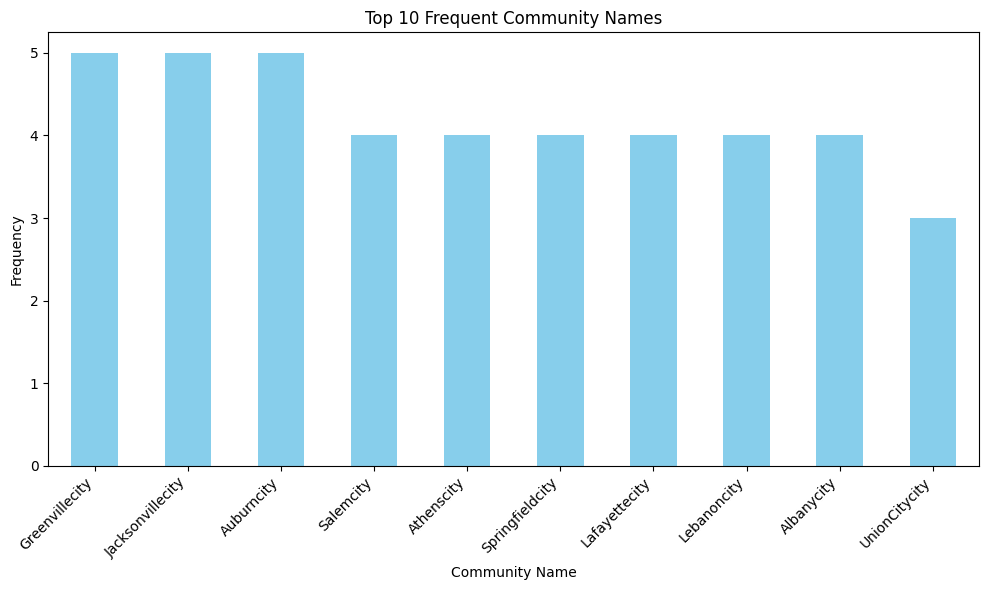

In [13]:
# For categorical Features
# 10 most frequent community names

top_10_communities = df['Community Name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_10_communities.plot(kind='bar', color='skyblue')
plt.title('Top 10 Frequent Community Names')
plt.xlabel('Community Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **Doing Some Specific Analysis**

- Let's see if the murder rate per capita has somnething to do with the annual median income of the households or family.

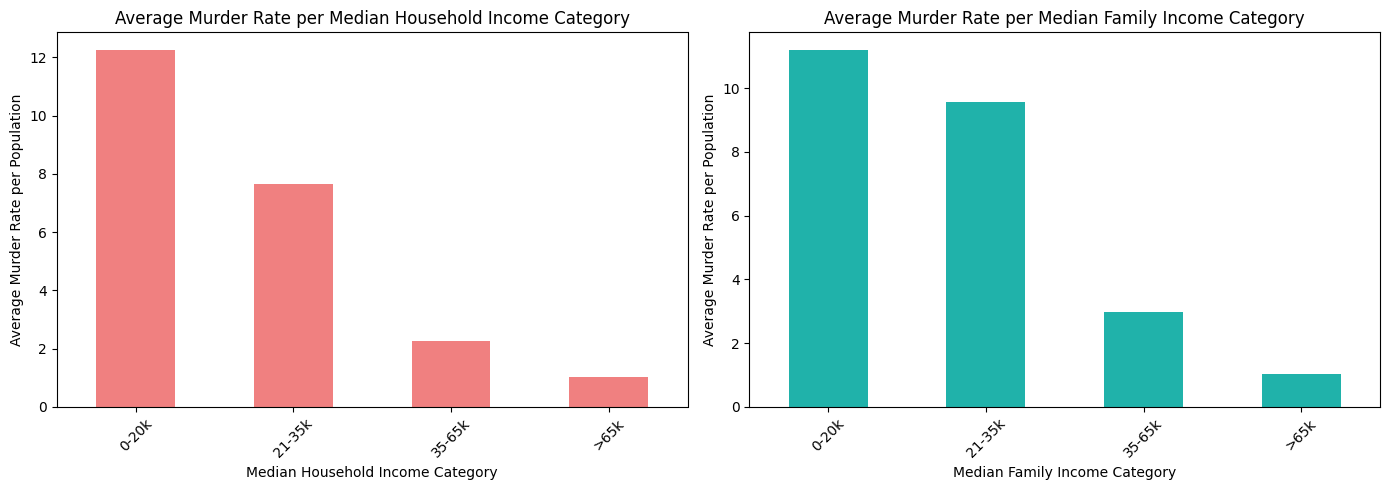

In [14]:
def learners_function(df):
  bins = [0, 20000, 35000, 65000, float('inf')]
  labels = ['0-20k', '21-35k', '35-65k', '>65k']
  features = ['Median Household Income', 'Median Family Income']
  col_category = ['Household Income Category', 'Family Income Category']

  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,5))

  for i, (features, cols) in enumerate(zip(features, col_category)):
    df[cols] = pd.cut(df[features], bins=bins, labels=labels)
    avg_murder_rate = df.groupby(cols, observed=False)['Murder Rate per Population'].mean()

    avg_murder_rate.plot(kind='bar', ax=axes[i], color='lightcoral' if i == 0 else 'lightseagreen')
    axes[i].set_title(f'Average Murder Rate per {features} Category')
    axes[i].set_xlabel(f'{features} Category')
    axes[i].set_ylabel('Average Murder Rate per Population')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

  plt.tight_layout()
  plt.show()

learners_function(df)

**Insights & Observations**
- Both household and family incomes show an inverse relationship with the murder rate—lower incomes tend to have higher murder rates, while higher incomes are associated with lower murder rates.
- The 0-20k income bracket has the highest murder rates across both median household and family income categories.
- The drop in murder rate as income increases is quite steep between the lowest and middle-income categories but tapers off at higher income levels, where the rates are already low.
- Interestingly, the family income categories show a more gradual decline in murder rates, particularly between the middle and high-income categories, compared to the household income categories

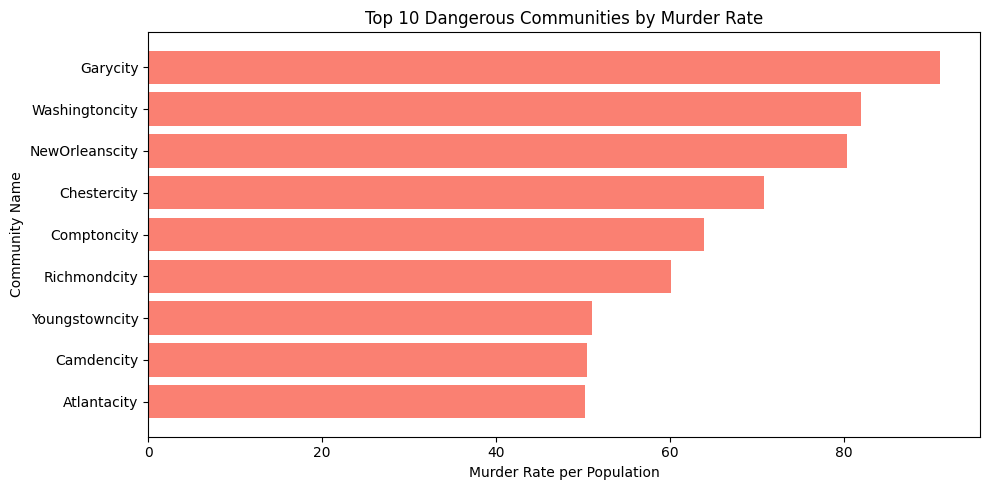

In [15]:
df_sorted = df.sort_values(by='Murder Rate per Population', ascending=False)
top_10_dangerous_communities = df_sorted[['Community Name', 'Murder Rate per Population']].head(10)

plt.figure(figsize=(10, 5))
plt.barh(top_10_dangerous_communities['Community Name'], top_10_dangerous_communities['Murder Rate per Population'], color='salmon')
plt.xlabel('Murder Rate per Population')
plt.ylabel('Community Name')
plt.title('Top 10 Dangerous Communities by Murder Rate')
plt.gca().invert_yaxis()  # Um die Reihenfolge umzukehren, damit die höchste Rate oben steht
plt.tight_layout()
plt.show()

**Insights and Observations:**
<br>

**Top Dangerous Communities**:
- Garycity has the highest murder rate, reaching close to 80. This suggests an extremely high level of violence in this community, indicating that, for every 100,000 people, around 80 murders occur. This could signify serious socio-economic issues or inadequate public safety measures.
- Washingtoncity and NewOrleanscity follow closely, with murder rates also exceeding 70%. These are also considered highly dangerous communities based on the murder rate per populatio

**Concerning Crime Levels Across the Top Communities**:
- All the communities in the top 10 exhibit murder rates over 50, which means that these cities face significant public safety concerns.
- Communities like Chestercity and Comptoncity, with murder rates slightly below 70, also experience very high levels of violent crime.
- Even the lowest on the list, Atlantacity, still has a murder rate exceeding 50, which is alarming when compared to national averages

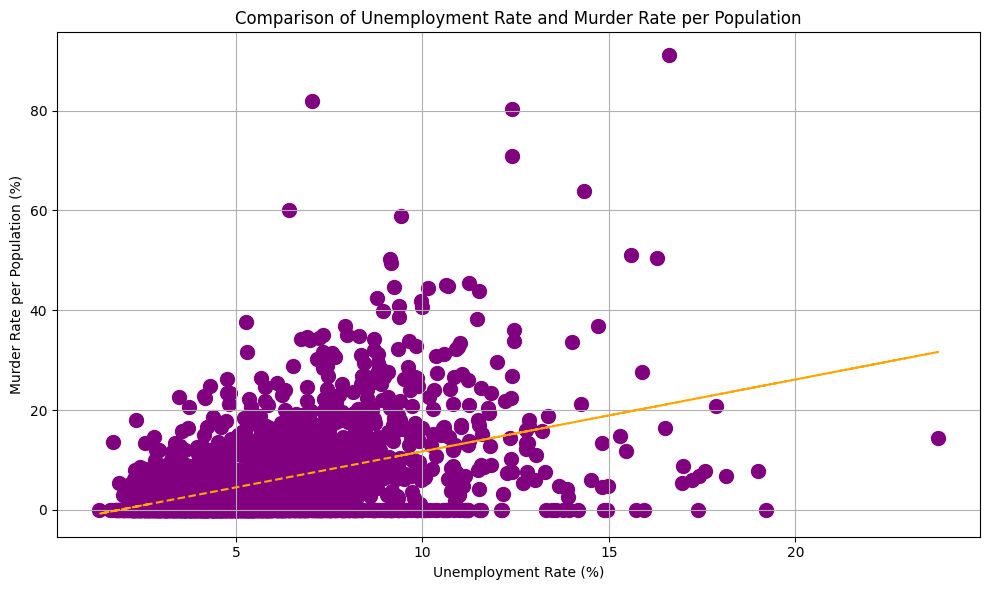

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(df['% Unemployment Rate'], df['Murder Rate per Population'], color='purple', s=100)
plt.title('Comparison of Unemployment Rate and Murder Rate per Population')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Murder Rate per Population (%)')

z = np.polyfit(df['% Unemployment Rate'], df['Murder Rate per Population'], 1)
p = np.poly1d(z)
plt.plot(df['% Unemployment Rate'], p(df['% Unemployment Rate']), color='orange', linestyle='--')

plt.grid(True)
plt.tight_layout()
plt.show()

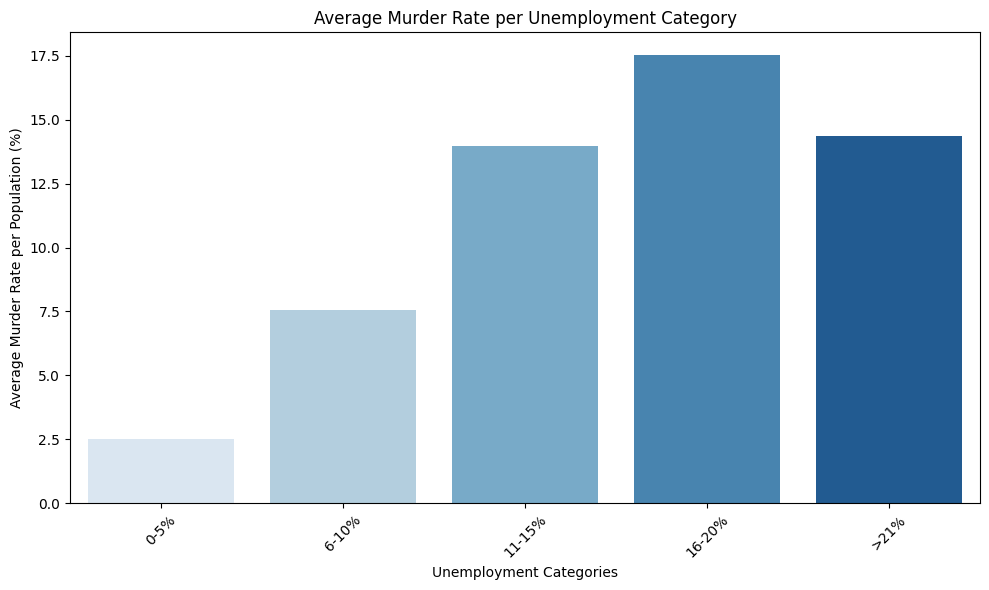

In [17]:
import seaborn as sns

bins = [0, 5, 10, 15, 20, float('inf')]
labels = ['0-5%', '6-10%', '11-15%', '16-20%', '>21%']
df['Unemployment Categories'] = pd.cut(df['% Unemployment Rate'], bins=bins, labels=labels)
mean_rate_per_unemployment_cat = df.groupby('Unemployment Categories', observed=False)['Murder Rate per Population'].mean()


plt.figure(figsize=(10, 6))

sns.barplot(x=mean_rate_per_unemployment_cat.index, y=mean_rate_per_unemployment_cat.values, palette='Blues', hue=mean_rate_per_unemployment_cat.index, dodge=False, legend=False)

plt.title('Average Murder Rate per Unemployment Category')
plt.xlabel('Unemployment Categories')
plt.ylabel('Average Murder Rate per Population (%)')
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()

**Insights and Observations**:
- The data suggests that unemployment has a notable impact on crime rates, with higher unemployment potentially contributing to social instability, which may lead to higher violent crime rates like murder.
- The decline in the >21% unemployment category compared to 16-20% might suggest that other factors, such as extreme poverty or economic policies, may influence murder rates at very high unemployment levels

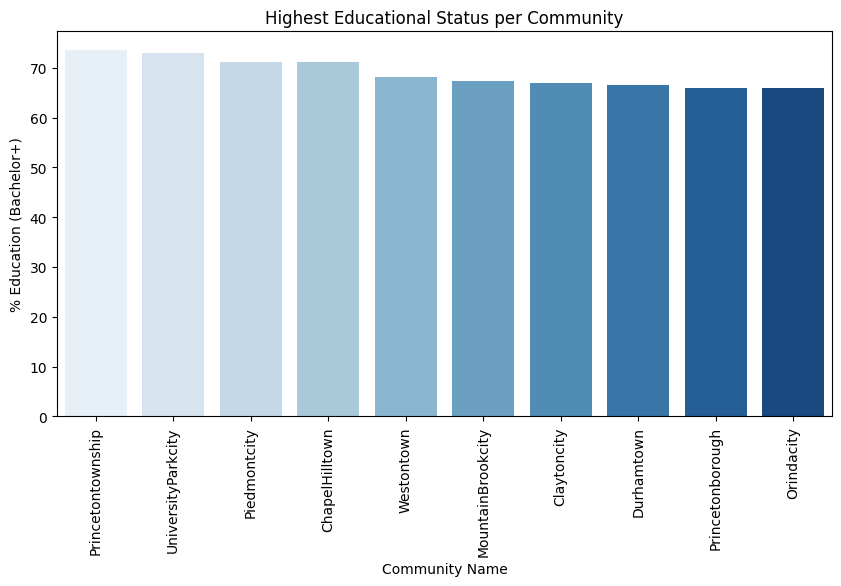

In [42]:
df_sort_by_education = df.sort_values('% Education (Bachelor+)', ascending=False)
df_sort_by_education = df_sort_by_education[['Community Name', '% Education (Bachelor+)']]
df_sort_by_education = df_sort_by_education.head(10)

plt.figure(figsize=(10, 5))
sns.barplot(data=df_sort_by_education, x='Community Name', y='% Education (Bachelor+)', hue='Community Name', palette='Blues', dodge=False, legend=False)
plt.title('Highest Educational Status per Community')
plt.xticks(rotation=90)
plt.show()


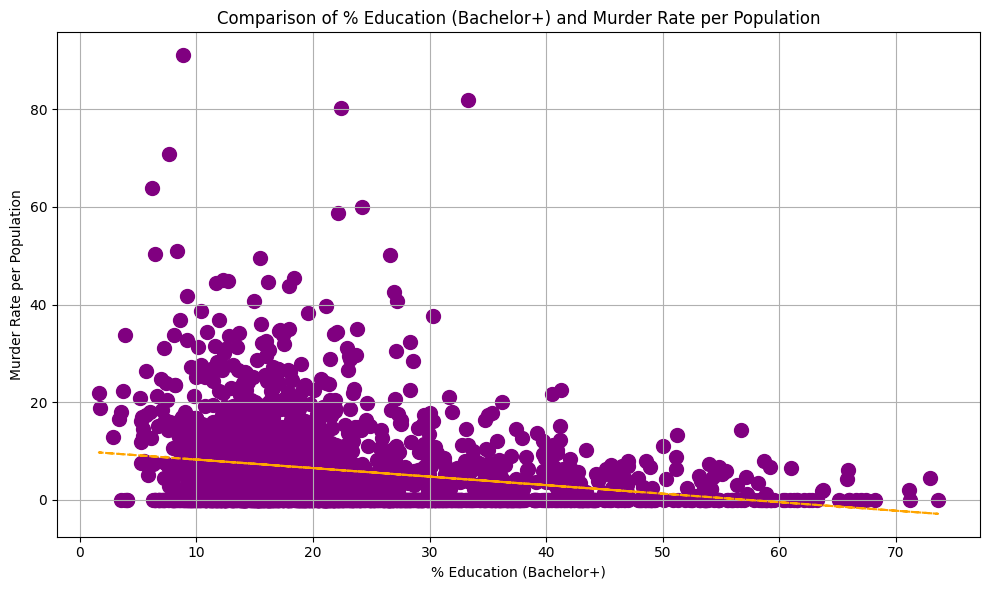

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(df['% Education (Bachelor+)'], df['Murder Rate per Population'], color='purple', s=100)
plt.title('Comparison of % Education (Bachelor+) and Murder Rate per Population')
plt.xlabel('% Education (Bachelor+)')
plt.ylabel('Murder Rate per Population')

z = np.polyfit(df['% Education (Bachelor+)'], df['Murder Rate per Population'], 1)
p = np.poly1d(z)
plt.plot(df['% Education (Bachelor+)'], p(df['% Education (Bachelor+)']), color='orange', linestyle='--')

plt.grid(True)
plt.tight_layout()
plt.show()

**Insights and Observations**
- Education as a Potential Crime Deterrent: The data suggests that higher education levels may contribute to lower murder rates, possibly through improved socioeconomic conditions, better job opportunities, and social stability.
- Outliers: There are outliers where low murder rates are observed in areas with low education levels and vice versa. This indicates that while education has an influence, other factors likely contribute to murder rates, such as economic, social, or regional influences.
- Policy Implication: Promoting education, particularly higher education, could be an effective strategy in reducing violent crime rates in certain areas

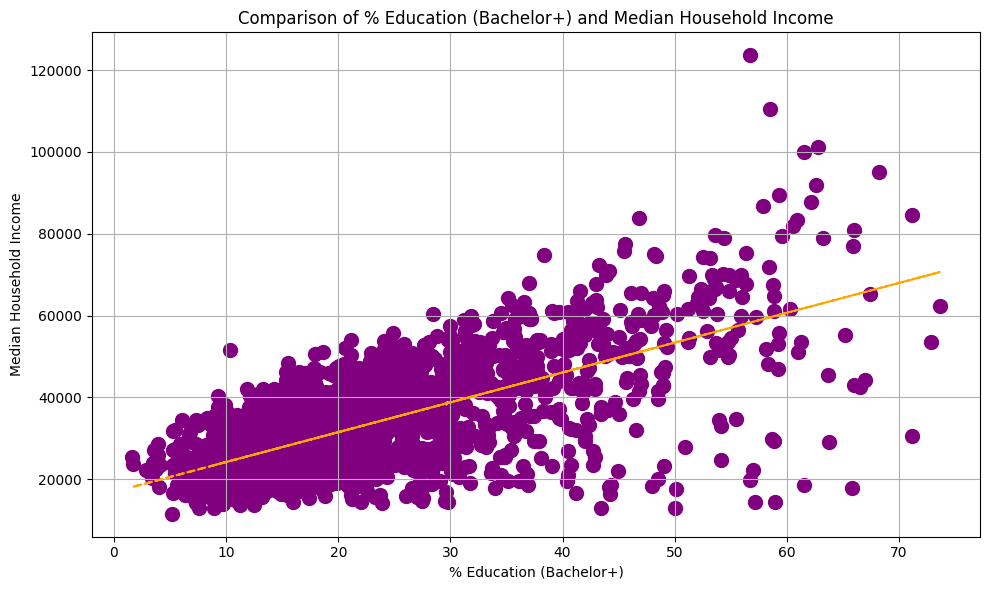

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(df['% Education (Bachelor+)'], df['Median Household Income'], color='purple', s=100)
plt.title('Comparison of % Education (Bachelor+) and Median Household Income')
plt.xlabel('% Education (Bachelor+)')
plt.ylabel('Median Household Income')

z = np.polyfit(df['% Education (Bachelor+)'], df['Median Household Income'], 1)
p = np.poly1d(z)
plt.plot(df['% Education (Bachelor+)'], p(df['% Education (Bachelor+)']), color='orange', linestyle='--')

plt.grid(True)
plt.tight_layout()
plt.show()

**Insights and Observations**
- Education as a Key to Economic Mobility: The plot highlights the strong link between education and economic outcomes. Communities with higher education levels tend to have significantly higher household incomes, indicating that education is a key driver of financial prosperity.
- Policy Implication: Investment in education, particularly in increasing the percentage of individuals obtaining a bachelor's degree or higher, could lead to higher household incomes and improved economic conditions in communities.
- Other Factors at Play: While education is an important factor, the presence of outliers suggests that other factors—such as job opportunities, regional economic conditions, or industry presence—might also contribute to median household income

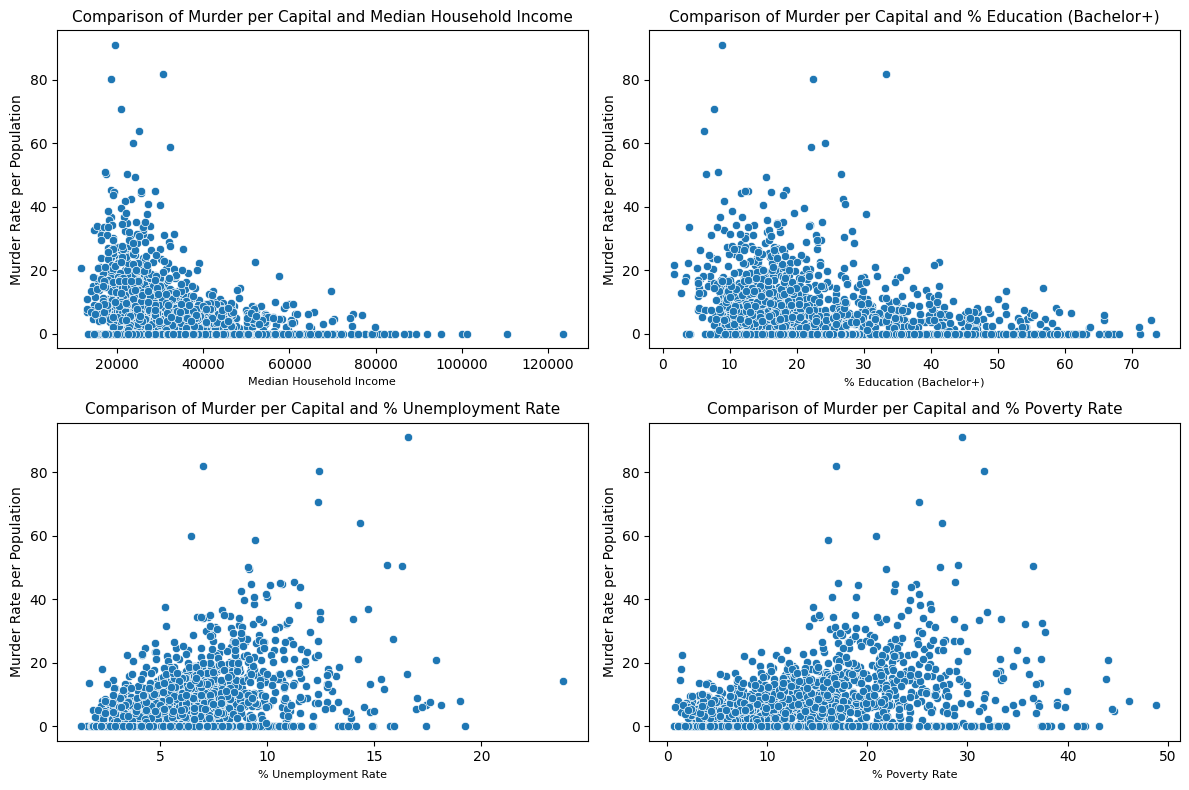

In [74]:
# With one view
dep_var = 'Murder Rate per Population'
indep_var = ['Median Household Income', '% Education (Bachelor+)', '% Unemployment Rate', '% Poverty Rate']

def plot_scatter(dep_var, indep_var, df):
  col = 2
  rows = (len(indep_var) // col) + (1 if len(indep_var) % col > 0 else 0)

  fig, axes = plt.subplots(rows, col, figsize=(12,8))
  axes = axes.flatten()

  for i, feature in enumerate(indep_var):
    sns.scatterplot(data=df, x=df[feature], y=dep_var, ax=axes[i])
    axes[i].set_xlabel(feature, size='8')
    axes[i].set_title(f'Comparison of Murder per Capital and {feature}', size='11')

  plt.tight_layout()
  plt.show()

plot_scatter(dep_var, indep_var, df)

**Conclusion:**
- With some data insights we see a strong dependency between the overall social status based on income, educational levels, unemployment and poverty rates and the murder rate per capita.
- With a deeper look into the data we could argument that missing education leads to less income, higher unemployment and therefor higher murder rates in the us communities